In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [50]:
df = pd.read_csv("C:/Users/pranay/Downloads/delivery_time.csv")

In [51]:
df.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [52]:
df.tail(5)

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [53]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [54]:
df.shape

(21, 2)

<AxesSubplot:>

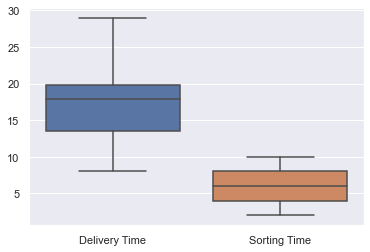

In [55]:
sns.boxplot(data=df)

In [56]:
#From the boxplot we can say that there are no outliers in the given dataset

In [57]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [58]:
df["Delivery Time"].quantile([0.25,0.5,0.75])

0.25    13.50
0.50    17.83
0.75    19.75
Name: Delivery Time, dtype: float64

In [59]:
x = df["Delivery Time"]
y = df["Sorting Time"]
import statsmodels.formula.api as smf
model = smf.ols("x~y", data = df).fit()

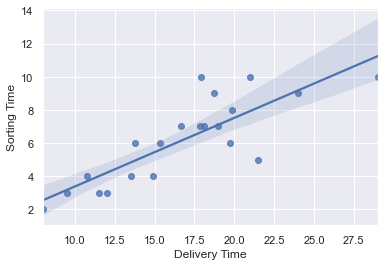

In [60]:
sns.regplot(x= df["Delivery Time"], y=df["Sorting Time"], data=df);

In [61]:
model.params

Intercept    6.582734
y            1.649020
dtype: float64

In [62]:
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
y            6.387447
dtype: float64 
 Intercept    0.001147
y            0.000004
dtype: float64


In [63]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [64]:
#predicting for new datapoint

#newdata=pd.Series([9])

In [65]:
#data_pred=pd.DataFrame(newdata,columns=['y'])

In [66]:
#model.predict(data_pred)

0    21.423913
dtype: float64

In [67]:
data_log = np.log(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

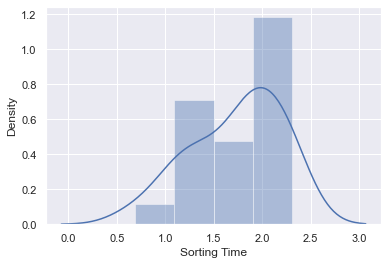

In [68]:
sns.distplot(data_log['Sorting Time'],kde=True)

In [69]:
data_log

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


In [70]:
x1 = df["Delivery Time"]
y1 = df["Sorting Time"]
import statsmodels.formula.api as smf
model_log = smf.ols("x1~y1", data = data_log).fit()

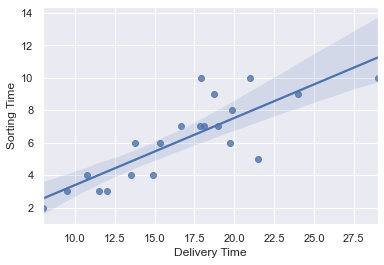

In [71]:
sns.regplot(x= df["Delivery Time"], y=df["Sorting Time"], data=data_log);

In [72]:
(model_log.rsquared,model_log.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [73]:
data_sqrt=np.sqrt(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

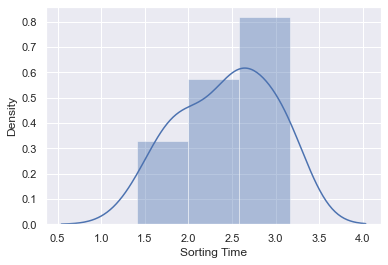

In [74]:
sns.distplot(data_sqrt['Sorting Time'],kde=True)

In [75]:
x2 = df["Delivery Time"]
y2 = df["Sorting Time"]
import statsmodels.formula.api as smf
model_sqrt = smf.ols("x2~y2", data = data_sqrt).fit()

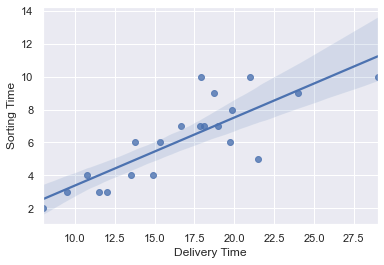

In [76]:
sns.regplot(x= df["Delivery Time"], y=df["Sorting Time"], data=data_log);

In [77]:
(model_sqrt.rsquared,model_sqrt.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [100]:
newdata=pd.Series([10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5])

In [101]:
data_pred=pd.DataFrame(newdata,columns=["y"])

In [102]:
pred_val = model.predict(data_pred)  #value for simple model

In [119]:
newdata1=pd.Series(np.log([10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5]))

In [120]:
data_pred1=pd.DataFrame(newdata1,columns=["y1"])

In [121]:
pred_val1 = model.predict(data_pred1) #log model

In [122]:
newdata2=pd.Series([10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5])

In [123]:
data_pred2=pd.DataFrame(newdata2,columns=["y2"])

In [124]:
pred_val2 = model.predict(data_pred2) #sqrt model

In [125]:
from sklearn import metrics

In [126]:
#rmse for normal model
print('Mean Squared Error:', metrics.mean_squared_error(x,pred_val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x,pred_val)))

Mean Squared Error: 7.793311548584062
Root Mean Squared Error: 2.7916503270617654


In [127]:
#rmse for log model
print('Mean Squared Error:', metrics.mean_squared_error(x1,pred_val1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x1,pred_val1)))

Mean Squared Error: 7.793311548584062
Root Mean Squared Error: 2.7916503270617654


In [128]:
pred_val1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [129]:
pred_val

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64